In [27]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
train_data = pd.read_csv("C:/Users/rajpu/OneDrive/Desktop/b/SalaryData_Train.csv")
test_data = pd.read_csv("C:/Users/rajpu/OneDrive/Desktop/b/SalaryData_Test.csv")


In [7]:
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [26]:
test_data 

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
train_data.shape


(30161, 14)

In [5]:
test_data.shape

(15060, 14)

In [13]:
features = train_data.drop(columns=["Salary"])
target = train_data["Salary"]


In [14]:

categorical_variables = ["workclass", "education", "maritalstatus", "occupation", "relationship", "race", "sex", "native"]

features = pd.get_dummies(features, columns=categorical_variables)



In [34]:
X_train = train_data.drop(columns=['Salary'])
y_train = train_data['Salary']
X_test = test_data.drop(columns=['Salary'])
y_test = test_data['Salary']

categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

encoder = OneHotEncoder(drop='first')
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_cols]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]))


In [35]:
X_train_encoded

,0
0,"(0, 4)\t1.0\n (0, 14)\t1.0\n (0, 24)\t1.0\..."
1,"(0, 3)\t1.0\n (0, 14)\t1.0\n (0, 22)\t1.0\..."
2,"(0, 1)\t1.0\n (0, 16)\t1.0\n (0, 31)\t1.0\..."
3,"(0, 1)\t1.0\n (0, 6)\t1.0\n (0, 22)\t1.0\n..."
4,"(0, 1)\t1.0\n (0, 14)\t1.0\n (0, 22)\t1.0\..."
...,...
30156,"(0, 1)\t1.0\n (0, 12)\t1.0\n (0, 22)\t1.0\..."
30157,"(0, 1)\t1.0\n (0, 16)\t1.0\n (0, 22)\t1.0\..."
30158,"(0, 1)\t1.0\n (0, 16)\t1.0\n (0, 26)\t1.0\..."
30159,"(0, 1)\t1.0\n (0, 16)\t1.0\n (0, 24)\t1.0\..."


In [38]:
model = GaussianNB()
model.fit(X_train_encoded, y_train)

ValueError: setting an array element with a sequence.

In [37]:


gnb = GaussianNB()
gnb.fit(features, target)


GaussianNB()

In [20]:
y_pred = gnb.predict(features)

In [22]:
cm = confusion_matrix(target, y_pred)
cm

array([[18151,  4502],
       [ 1435,  6073]], dtype=int64)

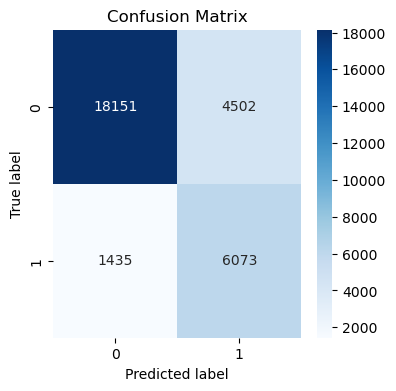

In [23]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [25]:
accuracy = accuracy_score(target, y_pred)
precision = precision_score(target, y_pred, average="weighted")
recall = recall_score(target, y_pred, average="weighted")
f1 = f1_score(target, y_pred, average="weighted")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.8031563940187659
Precision: 0.8389966416811576
Recall: 0.8031563940187659
F1 score: 0.8127029341690444
